## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации. 

Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделим внимание фильмам, которые получили государственную поддержку. Ответим на вопрос, насколько такие фильмы интересны зрителю. 

Будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

### 1.Получение данных 

In [87]:
# <импорт библиотек>
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:,.2f}'.format)

In [88]:
try:
    data = pd.read_csv('/datasets/mkrf_movies.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')
    
try:
    data1 = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    data1 = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

Выведем первые 10 строк и общую информацию таблиц

In [89]:
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [91]:
data1.head(10)

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"
5,111000119,"4,293,649.51"
6,111000212,200.00
7,111000216,"355,567.00"
8,111000313,710.00
9,111000314,"1,607,970.00"


In [92]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Изменим тип данных в столбце `puNumber` для объединения данных.

In [93]:
data = data.loc[data['puNumber'] != 'нет']

In [94]:
data['puNumber'] = data['puNumber'].astype(int)

Объеденим данные из двух датафреймов.

In [95]:
data = data.merge(data1, on='puNumber', how='left')

Выведем 10 строк и информацию новой таблицы

In [96]:
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [98]:
data1[~data1['puNumber'].isin(data['puNumber'].unique())]

,puNumber,box_office


После объединения датафреймов все объекты из датасета mkrf_movies вошли в получившийся датафрейм.

### 2. Предобработка данных

#### 2.1. Проверка типов данных

Изменим тип данных в столбце `show_start_date` на временной тип для удобства использования данных.

In [99]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

In [100]:
#data['ratings'] = data['ratings'].fillna('-1')
data.loc[data['ratings'].str.contains('%').fillna(False), 'ratings'].count()

29

Количество таких строк мало. Мы можем их удалить.

In [101]:
data = data.loc[~data['ratings'].str.contains('%').fillna(False)]

In [102]:
data['ratings'].count()

6490

Изменим тип данных в столбце `ratings` на вещественный тип для удобства использования данных.

In [103]:
data['ratings'] = pd.to_numeric(data['ratings'])

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7456 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7456 non-null   object             
 1   puNumber               7456 non-null   int32              
 2   show_start_date        7456 non-null   datetime64[ns, UTC]
 3   type                   7456 non-null   object             
 4   film_studio            7438 non-null   object             
 5   production_country     7454 non-null   object             
 6   director               7447 non-null   object             
 7   producer               6888 non-null   object             
 8   age_restriction        7456 non-null   object             
 9   refundable_support     330 non-null    float64            
 10  nonrefundable_support  330 non-null    float64            
 11  budget                 330 non-null    float64          

#### 2.2. Изучение пропусков в датафрейме

In [105]:
# Контроль размера датасета до и после обработки
temp = data.copy() # создаем копию датасета до преобразования
len(temp)

7456

In [106]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7126
nonrefundable_support    7126
budget                   7126
financing_source         7126
ratings                   966
genres                    972
box_office               4313
dtype: int64

Удалим малочисленные пропуски.

In [107]:
data = data.dropna(subset=['director'])
data = data.dropna(subset=['production_country'])
data = data.dropna(subset=['film_studio'])

In [108]:
data.loc[data['producer'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.00,"приключения,военный",NaN
7405,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,военный,NaN
7406,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"драма,мелодрама",NaN
7407,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,"драма,мелодрама,военный",NaN


Заполнить пропуски в столбце `producer` не получится. Оставим, как есть.

In [109]:
data.loc[data['budget'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7481,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Информация по государственной поддержке есть только по российским фильмам, но у большинства российских фильмов нет информации о господдержке. Возможно большинство российских фильмов снималось без господдержки. Оставим пропуски в столбцах `refundable_support, nonrefundable_support, budget`.

In [110]:
data.loc[data['ratings'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7479,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"219,569.00"
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропуски в этом столбце не связаны с данными других столбцов. Оставим их.

In [111]:
data.loc[data['genres'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7479,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"219,569.00"
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропуски в этом столбце, скорее всего, связаны с отсутствием информации. Заполнить их не получится.

In [112]:
data.loc[data['box_office'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7481,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропуски в этом столбце означают, что фильм не вышел в прокат. Оставим эти пропуски.

#### 2.3. Изучение дубликатов в датафрейме

In [113]:
data.duplicated().sum()

0

Явные дубликаты необнаружены.

In [114]:
data['title'].nunique()

6716

In [115]:
data.loc[data['title'].duplicated(keep=False)].sort_values(by='title').head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
454,100 миллионов евро,221024616,2016-05-25 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,комедия,NaN
455,100 миллионов евро,121013712,2012-06-06 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,комедия,NaN
5057,127 часов,221069011,2011-05-18 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"триллер,биография,драма",NaN
4851,127 часов,121000811,2011-01-27 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"триллер,биография,драма",NaN
3128,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.70,"боевик,триллер,драма",NaN
3129,13 часов: Тайные солдаты Бенгази,121001016,2016-01-15 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.70,"боевик,триллер,драма","18,439,240.55"
1494,13-й район: Кирпичные особняки,121008314,2014-04-25 12:00:00+00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.50,"боевик,криминал",750.00
1493,13-й район: Кирпичные особняки,221033314,2014-08-20 12:00:00+00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.50,"боевик,криминал",NaN
4106,13.,221123710,2010-10-25 12:00:00+00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.80,"триллер,драма,криминал",NaN
4306,13.,121018110,2010-09-30 12:00:00+00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.80,"триллер,драма,криминал",NaN


Повторы в `title` объясняются тем, что один и тот же фильм могут начать показывать в разное время под разной лицензией и/или разными прокатчиками.

In [116]:
data['puNumber'].nunique()

7427

In [117]:
data.loc[data['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


Значения `puNumber` должны быть уникальными. Под одним номером прокатного удостоверения числятся два разных фильма с одной датой премьеры. Вероятно сыграл человеческий фактор при заполнении какой-нибудь формы. Этот номер не имеет принципиального значения, оставим так.

#### 2.4. Изучение категориальных значений

In [118]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [119]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [120]:
data['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [121]:
data['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', nan,
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [122]:
data['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [123]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [124]:
data['genres'] = data['genres'].fillna('Unknown')

In [125]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

Заменим разделитель стран.

In [126]:
data['production_country'] = data['production_country'].str.replace('-', ',').str.replace(' ', '')

In [127]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР,Венгрия',
       'Германия,Великобритания', 'Великобритания,Италия', 'Чехословакия',
       'США,Франция,Турция', 'НоваяЗеландия', 'Канада,Франция,Испания',
       'США,Германия', 'США,Великобритания', 'Великобритания',
       'Франция,Мексика,США', 'Россия,Казахстан,США', 'СССР,Швеция',
       'СССР,Франция,Англия,Куба,ГДР', 'Германия',
       'Великобритания,США,Германия,КНР', 'СССР,ЧССР,ЗападныйБерлин,ПНР',
       'СССР,Италия', 'Гонконг,КНР', 'США,Франция',
       'США,Япония,Франция,Великобритания',
       'Гонконг,Сингапур,Таиланд,Великобритания', 'США,Канада',
       'Франция,Италия,Великобритания,США', 'Франция,США',
       'Ирландия,Великобритания,Германия', 'Чехия', 'США,Австралия',
       'СССР,Финляндия', 'США,Франция,Великобритания,Австрия',
       'США,Бельгия', 'США,Ирландия,Великобритания', 'Великобритания,США',
       'Люксембург,Нидерланды,Испания,Великобритания,США,Италия',
       'Великобритания,Франция,США', 'НоваяЗеландия,США

Во многих строках категориальных данных присутсвуют пробелы, которые создают неявные дубликаты. Удалим эти пробелы с помощью метода `str.strip()`

In [128]:
data['type'] = data['type'].str.strip()
data['film_studio'] = data['film_studio'].str.strip()
data['director'] = data['director'].str.strip()
data['producer'] = data['producer'].str.strip()
data['genres'] = data['genres'].str.strip()

Общая проблема многих колонок с категориальными данными связана с тем, что они содержат очень много уникальных значений из-за того, что в них идет перечисления отдельных признаков.</font>

#### 2.5. Проверка количественных значений

Рассмотрим сводную статистику:

In [129]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,429.00",330.00,330.00,330.00,"6,482.00","3,140.00"
mean,"135,264,625.21","11,936,363.64","49,233,297.92","127,835,768.11",6.48,"76,744,746.17"
std,"38,390,636.43","24,974,945.34","60,073,639.80","188,996,337.04",1.10,"240,841,410.32"
min,"1,811,096.00",0.00,0.00,0.00,1.00,0.00
25%,"113,000,417.00",0.00,"25,000,000.00","42,404,381.75",5.90,"87,885.75"
50%,"121,015,612.00",0.00,"30,000,000.00","69,118,977.00",6.60,"2,357,735.25"
75%,"124,003,314.00","15,000,000.00","41,125,000.00","145,905,958.50",7.20,"24,206,198.43"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.20,"3,073,568,690.79"


Есть ряд фильмов, которые получали господдержку, но в бюджете стоит 0. Выясним в каком объёме обычно оказывалась поддержка и заменим средним процентом от поддержки. Суммируем оба вида господдержки.

In [130]:
invalid_budget = data.loc[data['refundable_support'] + data['nonrefundable_support'] > data['budget']]
invalid_budget

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


In [131]:
data['support_part'] = round((data['refundable_support']+data['nonrefundable_support'])/data['budget'], 2)
support_percentage = data['support_part'].median()

In [132]:
data.loc[invalid_budget.index, 'budget'] = (data.loc[invalid_budget.index, 'refundable_support'] + data.loc[invalid_budget.index, 'nonrefundable_support']) / support_percentage

data.loc[invalid_budget.index]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_part
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00","37,096,774.19","Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10",inf
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00","120,967,741.94",Фонд кино,6.60,драма,"446,163,511.00",inf
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00","129,032,258.06",Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40",inf
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,"32,258,064.52",Фонд кино,6.20,"комедия,фэнтези","67,418,974.80",inf
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00","258,064,516.13",Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40",inf
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00","95,161,290.32",Фонд кино,6.30,"комедия,драма","1,957,738.51",inf
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00","56,451,612.90",Фонд кино,5.10,"комедия,мелодрама","72,937,783.20",inf
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00","9,677,419.35",Министерство культуры,4.30,комедия,"15,362,931.43",inf
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00","112,903,225.81",Фонд кино,6.30,"комедия,мелодрама","70,299,052.00",inf
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00","403,225,806.45",Фонд кино,5.60,фантастика,"1,038,321,489.00",inf


In [133]:
# Проверим сколько удалено строк датасета
a, b = len(temp), len(data)
print(a, b, round((a-b)/a*100, 2))

7456 7429 0.36


In [134]:
data['ratings'].describe()[['min', 'max']]

min   1.00
max   9.20
Name: ratings, dtype: float64

Значения столбца находятся в допустимом диапазоне.

In [135]:
data[data['box_office'] == 0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_part
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР,Франция,Англия,Куба,ГДР",Эмиль Лотяну,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,"драма,биография,музыка",0.00,NaN
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.20,драма,0.00,NaN
596,Запах вереска,111003012,2012-05-23 12:00:00+00:00,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.30,комедия,0.00,NaN
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00+00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...","Германия,Нидерланды,Беларусь,Россия,Латвия",Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.50,"драма,военный,история",0.00,NaN
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.40,"аниме,мультфильм,драма",0.00,NaN
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.70,"аниме,мультфильм,фантастика",0.00,NaN
976,Гарегин Нжде,131000213,2013-04-23 12:00:00+00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.90,биография,0.00,NaN
1126,Марафон,111006712,2012-12-18 12:00:00+00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.50,"комедия,мелодрама",0.00,NaN
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11 12:00:00+00:00,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.80,"мелодрама,комедия,драма",0.00,NaN
1559,Последняя любовь мистера Моргана /По роману Фр...,121002614,2014-02-11 12:00:00+00:00,Художественный,"Камински Штим Фильм, Бавариа Пикчерз, Сенатор ...","Германия,Бельгия,США,Франция",Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.90,драма,0.00,NaN


Скорее всего информация о сборах неизвестна. Количество этих строк мало. Удалим их.

In [136]:
data = data[data['box_office'] != 0]

In [137]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,support_part
count,"7,406.00",330.00,330.00,330.00,"6,463.00","3,117.00",330.00
mean,"135,322,936.62","11,936,363.64","49,233,297.92","134,639,137.93",6.48,"77,311,037.21",inf
std,"38,434,435.05","24,974,945.34","60,073,639.80","188,040,274.24",1.10,"241,638,029.16",NaN
min,"1,811,096.00",0.00,0.00,"9,677,419.35",1.00,40.00,0.04
25%,"113,000,643.75",0.00,"25,000,000.00","46,168,856.75",5.90,"103,210.00",0.39
50%,"121,015,617.50",0.00,"30,000,000.00","74,955,000.00",6.60,"2,441,370.00",0.62
75%,"124,003,318.75","15,000,000.00","41,125,000.00","150,006,429.75",7.20,"24,872,554.03",0.66
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.20,"3,073,568,690.79",inf


#### Шаг 2.6. Создание новых столбцов

In [138]:
data['year'] = pd.to_datetime(data['show_start_date']).dt.year

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7406 entries, 0 to 7484
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7406 non-null   object             
 1   puNumber               7406 non-null   int32              
 2   show_start_date        7406 non-null   datetime64[ns, UTC]
 3   type                   7406 non-null   object             
 4   film_studio            7406 non-null   object             
 5   production_country     7406 non-null   object             
 6   director               7406 non-null   object             
 7   producer               6846 non-null   object             
 8   age_restriction        7406 non-null   object             
 9   refundable_support     330 non-null    float64            
 10  nonrefundable_support  330 non-null    float64            
 11  budget                 330 non-null    float64          

In [140]:
def main(string):
    return string.split(',')[0]

In [141]:
data['main_director'] = data['director'].apply(main)

In [142]:
data['main_genres'] = data['genres'].apply(main)

In [143]:
data.head(30)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_part,year,main_director,main_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,NaN,2015,Тимур Бекмамбетов,фантастика
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN,NaN,2016,В.Абдрашитов,драма
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00",NaN,2013,В.Меньшов,мелодрама
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.60,"мюзикл,мелодрама,комедия",NaN,NaN,2014,Джон Туртурро,мюзикл
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.00,"комедия,криминал",NaN,NaN,2016,Эрик Беснард,комедия
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР,Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN,NaN,2014,В.Титов,мелодрама


Мы провели предобработку данных. Преобразовали типы данных, там где это было необходимо и изучили дубликаты. Создали воспомогательные столбцы.

### 3. Исследовательский анализ данных


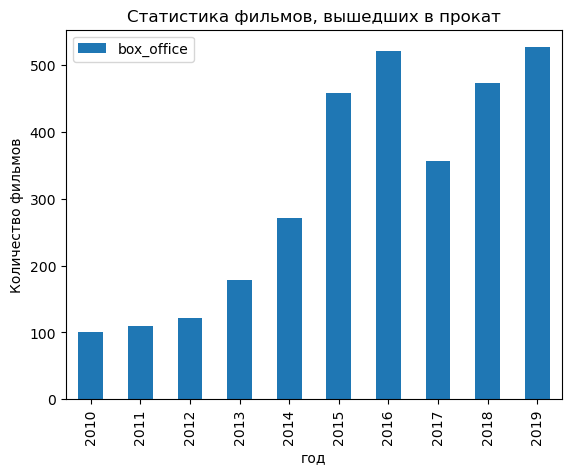

In [144]:
data.pivot_table(index='year', values='box_office', aggfunc='count').plot(y='box_office', kind='bar')
plt.title("Статистика фильмов, вышедших в прокат")
plt.xlabel("год")
plt.ylabel("Количество фильмов")
plt.show()

В целом наблюдается динамика увеличения количества фильмов, вышедших в прокат.

In [145]:
for d in data['year'].sort_values().unique():
    print(d, ':', data.loc[(data['year'] == d), 'box_office'].count() / data.loc[(data['year'] == d), 'puNumber'].count())

2010 : 0.10358974358974359
2011 : 0.17609046849757673
2012 : 0.20683760683760682
2013 : 0.28731942215088285
2014 : 0.3408521303258145
2015 : 0.6589928057553956
2016 : 0.6424167694204685
2017 : 0.7077534791252486
2018 : 0.5399543378995434
2019 : 0.5722041259500543


Период с 2015 года полнее всего предоставлен в данных.

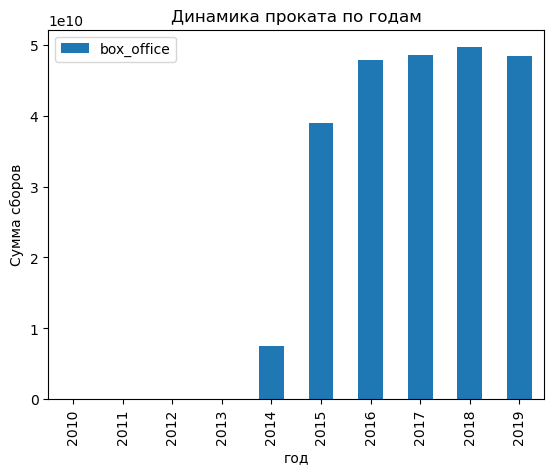

In [146]:
data.pivot_table(index='year', values='box_office', aggfunc='sum').plot(y='box_office', kind='bar')
plt.title("Динамика проката по годам")
plt.xlabel("год")
plt.ylabel("Сумма сборов")
plt.show()

В 2014 году сумма сборов была минимальной, в 2018 году сумма сборов была максимальной.

In [147]:
data.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
year,,
2010,"24,046.08","1,710.00"
2011,"129,383.17","3,000.00"
2012,"57,101.93","6,220.00"
2013,"166,478.81","3,580.00"
2014,"27,371,130.75","21,445.00"
2015,"85,078,748.17","5,104,961.45"
2016,"91,867,044.20","4,004,861.50"
2017,"136,414,801.29","10,177,833.50"


Медианные значения сборов сильно меньше средних. Это может быть связано с тем, что на среднее значение сильно влияют немногочисленные фильмы с очень большой суммой сборов.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Можно сократить строку колонки возрастной категории до значения возраста в кавычках, для этого следует извлечь из строки символы до разделителя `-`.</font>

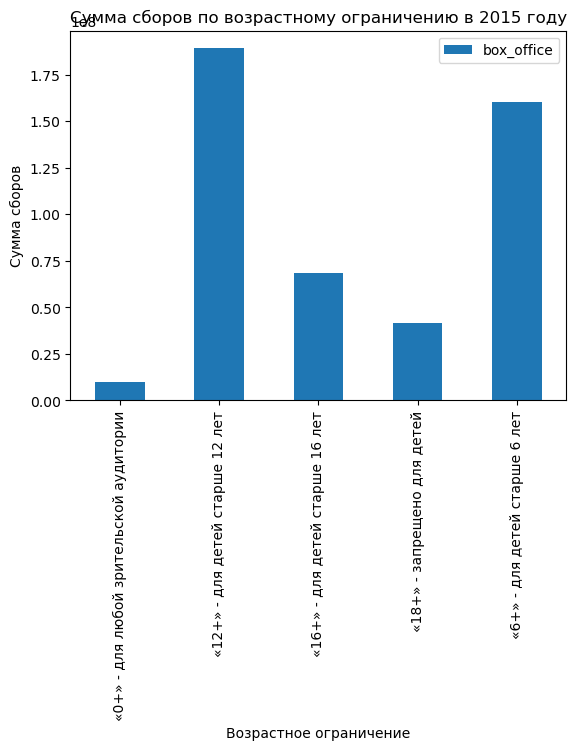

In [148]:
data.loc[data['year']==2015].pivot_table(index='age_restriction', values='box_office').plot(y='box_office', kind='bar')
plt.title("Сумма сборов по возрастному ограничению в 2015 году")
plt.xlabel("Возрастное ограничение")
plt.ylabel("Сумма сборов")
plt.show()

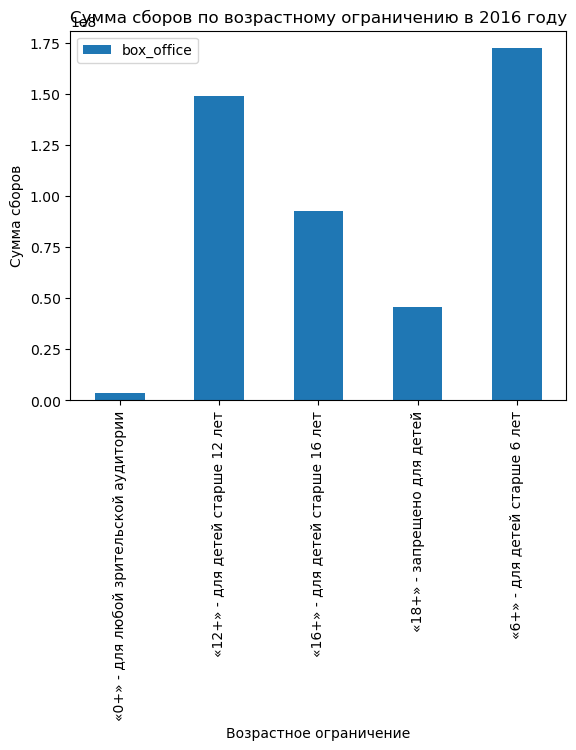

In [149]:
data.loc[data['year']==2016].pivot_table(index='age_restriction', values='box_office').plot(y='box_office', kind='bar')
plt.title("Сумма сборов по возрастному ограничению в 2016 году")
plt.xlabel("Возрастное ограничение")
plt.ylabel("Сумма сборов")
plt.show()

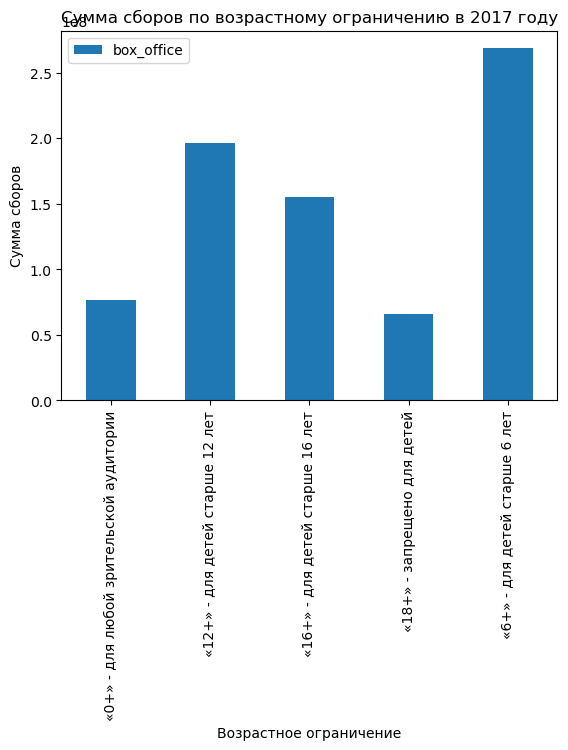

In [150]:
data.loc[data['year']==2017].pivot_table(index='age_restriction', values='box_office').plot(y='box_office', kind='bar')
plt.title("Сумма сборов по возрастному ограничению в 2017 году")
plt.xlabel("Возрастное ограничение")
plt.ylabel("Сумма сборов")
plt.show()

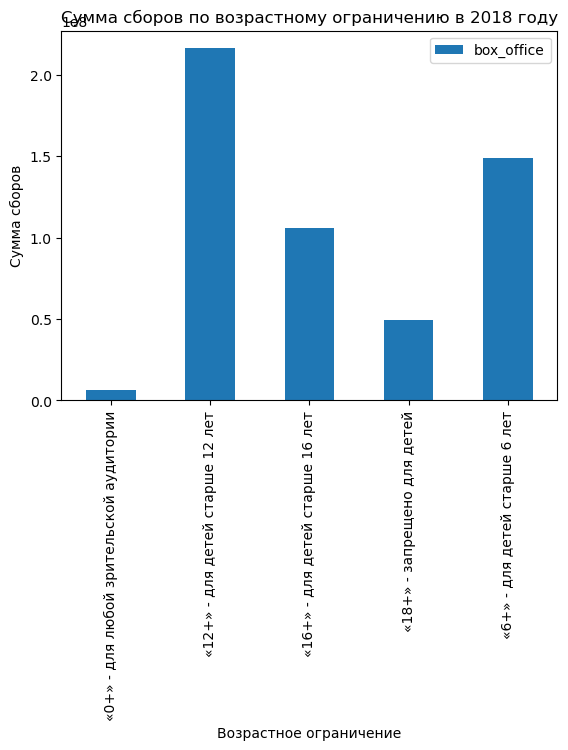

In [151]:
data.loc[data['year']==2018].pivot_table(index='age_restriction', values='box_office').plot(y='box_office', kind='bar')
plt.title("Сумма сборов по возрастному ограничению в 2018 году")
plt.xlabel("Возрастное ограничение")
plt.ylabel("Сумма сборов")
plt.show()

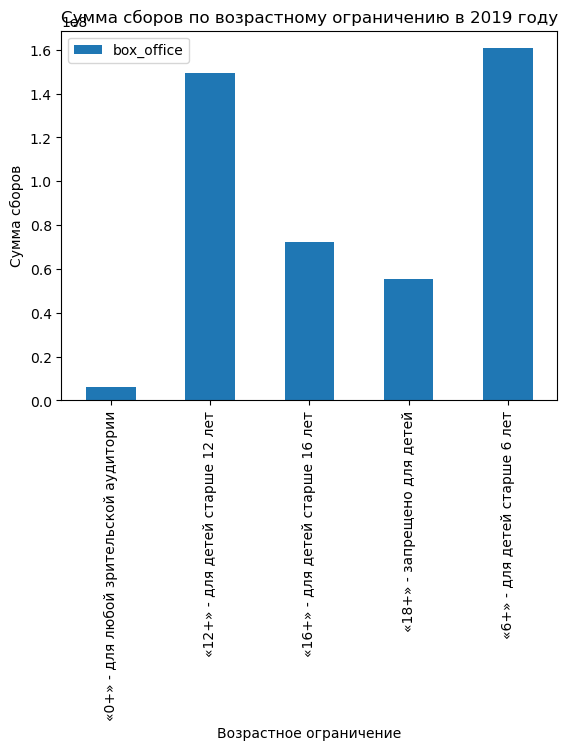

In [152]:
data.loc[data['year']==2019].pivot_table(index='age_restriction', values='box_office').plot(y='box_office', kind='bar')
plt.title("Сумма сборов по возрастному ограничению в 2019 году")
plt.xlabel("Возрастное ограничение")
plt.ylabel("Сумма сборов")
plt.show()

Возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) влияет на сборы фильма в прокате. В 2015 и 2018 год фильмы сограничением «12+» собрали больше всего денег в прокате. В другие года наибольшее количество денег собрали фильмы с ограничением «6+». Это может быть связано с выпуском большого количества фильмов с большим сбором в определенной категории в тот или иной год.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Можно дополнить анализ диаграммой размаха сборов в прокате по возрастным категориям.</font>

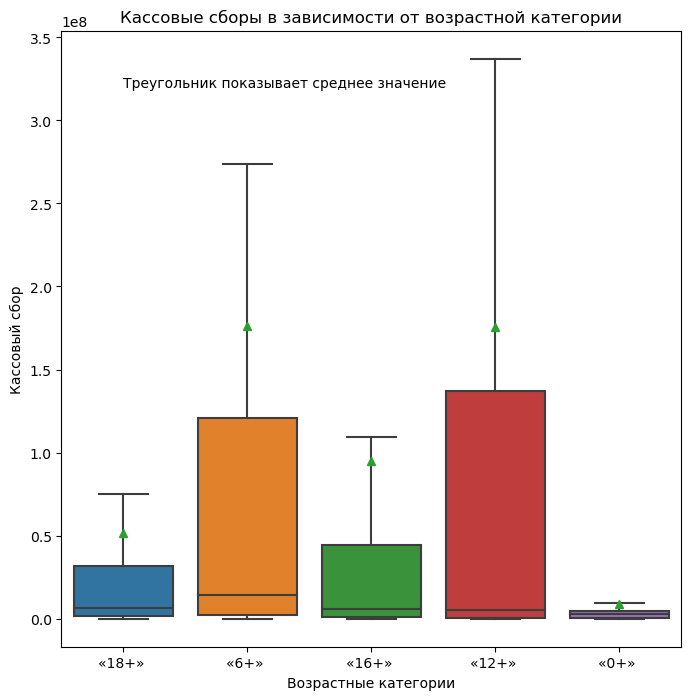

In [153]:
import seaborn as sns
temp = data.copy()
# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = temp['year'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.2e8,'Треугольник показывает среднее значение')
plt.show()

Наблюдается динамика увеличения фильмов, вышедших в прокат и увеличение суммы сборов. Наибольшую сумму сборов имеют фильмы с возрастным ограничением «6+» и «12+».

### 4. Фильмы, которые получили государственную поддержку

Создадим датасет с отфильтрованными фильмами с господдержкой.

In [154]:
data_support = data.loc[data['support_part']>0]
data_support.head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_part,year,main_director,main_genres
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",0.33,2013,А.Атанесян,драма
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,NaN,Unknown,"28,140.00",0.70,2014,А.Якимчук,Unknown
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",0.61,2013,Р.Давлетьяров,комедия
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",0.69,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",0.62,2014,М.Угаров,драма
1853,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.00,"25,000,000.00","51,850,000.00",Министерство культуры,6.10,"мультфильм,фэнтези,история","15,078,858.60",0.48,2015,С.Серегин,мультфильм
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,"50,000,000.00","100,000,000.00","220,588,394.00",Фонд кино,8.50,"драма,военный,история","249,166,767.70",0.68,2015,Р.Давлетьяров,драма
1870,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия,Франция,Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.00,"46,502,299.00","86,210,067.00","Министерство культуры, Фонд кино",6.70,драма,"4,731,239.50",0.54,2014,В.Глаголева,драма
1902,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.00,"75,000,000.00","139,551,503.00",Фонд кино,7.00,"триллер,боевик,приключения","352,804,320.40",0.54,2015,А.Войтинский,триллер
1911,Ведьма .,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.00,"34,000,000.00","48,571,430.00",Министерство культуры,7.40,"фэнтези,приключения,драма","51,907.50",0.70,2015,Д.Федоров,фэнтези


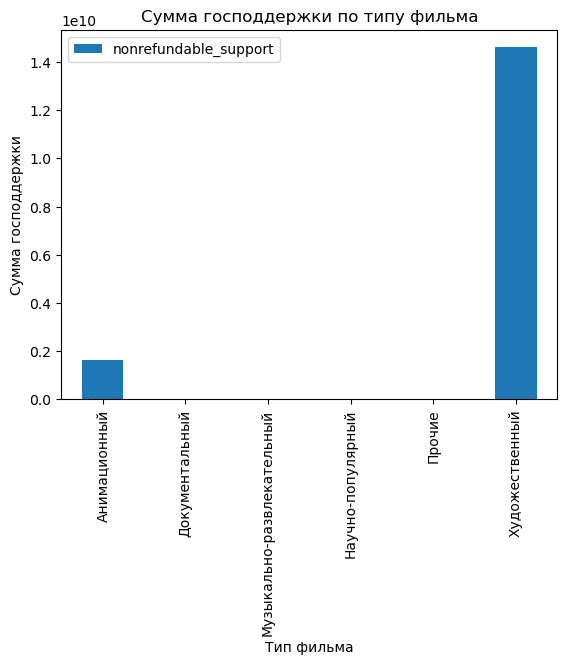

In [155]:
data.pivot_table(index='type', values='nonrefundable_support', aggfunc='sum').plot(y='nonrefundable_support', kind='bar')
plt.title("Сумма господдержки по типу фильма")
plt.xlabel("Тип фильма")
plt.ylabel("Сумма господдержки")
plt.show()

Государственную поддержку получили только анимационные, документальные и художественные фильмы. Причем в большей степени спонсируются художественные.

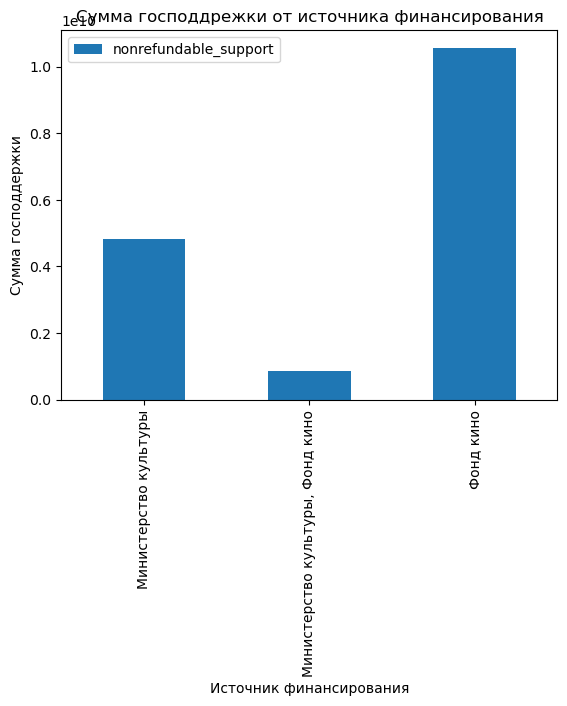

In [156]:
data.pivot_table(index='financing_source', values='nonrefundable_support', aggfunc='sum').plot(y='nonrefundable_support', kind='bar')
plt.title("Сумма господдрежки от источника финансирования")
plt.xlabel("Источник финансирования")
plt.ylabel("Сумма господдержки")
plt.show()

Доля государственного финансирования больше от фонда кино.

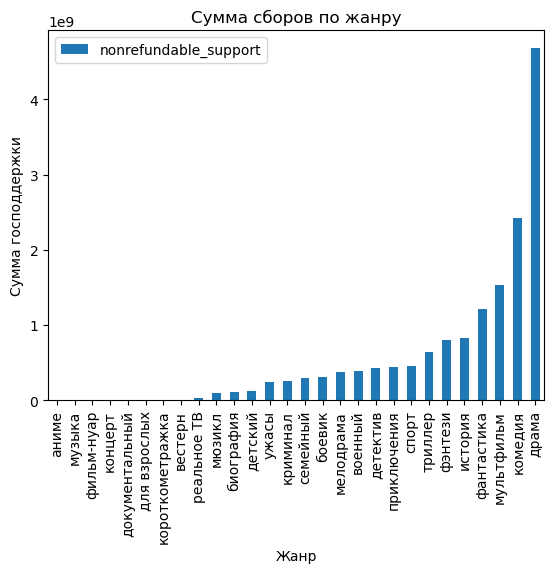

In [157]:
data.loc[data['main_genres']!='Unknown'].pivot_table(index='main_genres', values='nonrefundable_support', aggfunc='sum').sort_values('nonrefundable_support').plot(y='nonrefundable_support', kind='bar')
plt.title("Сумма сборов по жанру")
plt.xlabel("Жанр")
plt.ylabel("Сумма господдержки")
plt.show()

Нибольшую долю государственной поддержки в бюджете имеют драмы и комедии.

Коэффициент корреляции: 0.14152118198208152


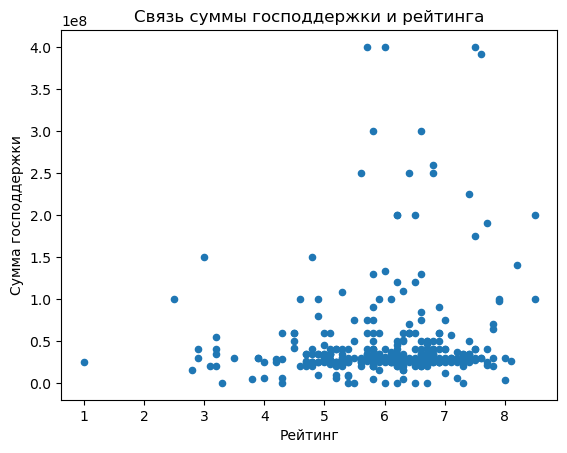

In [158]:
print('Коэффициент корреляции:', data['ratings'].corr(data['nonrefundable_support']))
data.sort_values('ratings').plot(x='ratings', y='nonrefundable_support', kind='scatter')
plt.title("Связь суммы господдержки и рейтинга")
plt.xlabel("Рейтинг")
plt.ylabel("Сумма господдержки")
plt.show()

Сумма государственной поддержки и райтинг фильма не зависимые величины.

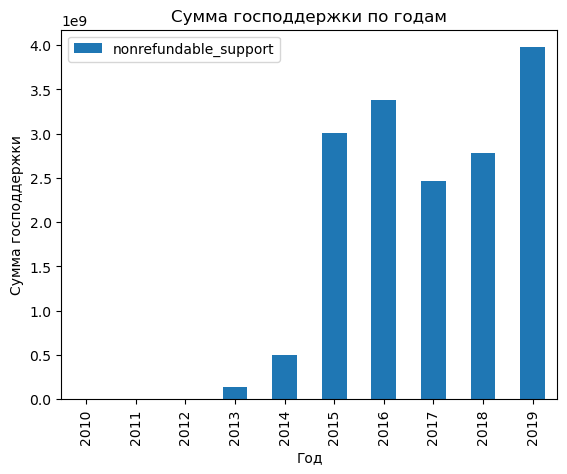

In [159]:
data.pivot_table(index='year', values='nonrefundable_support', aggfunc='sum').plot(y='nonrefundable_support', kind='bar')
plt.title("Сумма господдержки по годам")
plt.xlabel("Год")
plt.ylabel("Сумма господдержки")
plt.show()

Сумма государственной поддержки выше в 2019 году.

In [160]:
data['nonrefundable_support'].describe()

count           330.00
mean     49,233,297.92
std      60,073,639.80
min               0.00
25%      25,000,000.00
50%      30,000,000.00
75%      41,125,000.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

В среднем на поддержку фильма выделяют 30000000.

In [161]:
data.groupby('year').sum()['nonrefundable_support'].describe()

count              10.00
mean    1,624,698,831.20
std     1,632,092,694.86
min                 0.00
25%        33,586,986.25
50%     1,482,813,540.00
75%     2,949,533,621.25
max     3,976,000,000.00
Name: nonrefundable_support, dtype: float64

В год выделяют около 1,451,313,540.00 рублей на поддержку кино.

In [162]:
data_support['box_office'].describe()

count             316.00
mean      133,267,004.60
std       335,733,734.01
min             1,550.00
25%         1,272,646.25
50%        16,390,500.50
75%       106,934,534.82
max     3,073,568,690.79
Name: box_office, dtype: float64

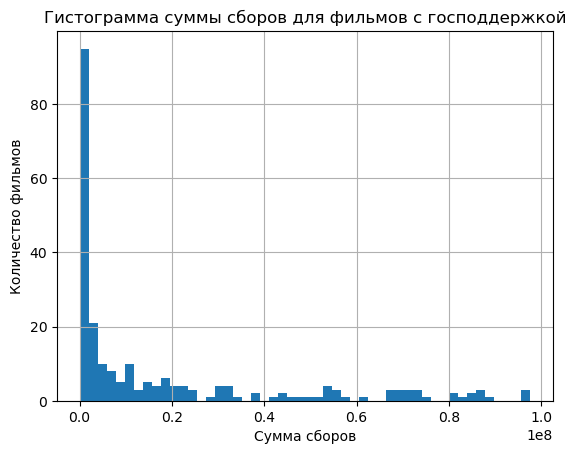

In [163]:
data_support.loc[data_support['box_office']<100000000, 'box_office'].hist(bins=50)
plt.title("Гистограмма суммы сборов для фильмов с господдержкой")
plt.xlabel("Сумма сборов")
plt.ylabel("Количество фильмов")
plt.show()

In [164]:
data['box_office'].describe()

count           3,117.00
mean       77,311,037.21
std       241,638,029.16
min                40.00
25%           103,210.00
50%         2,441,370.00
75%        24,872,554.03
max     3,073,568,690.79
Name: box_office, dtype: float64

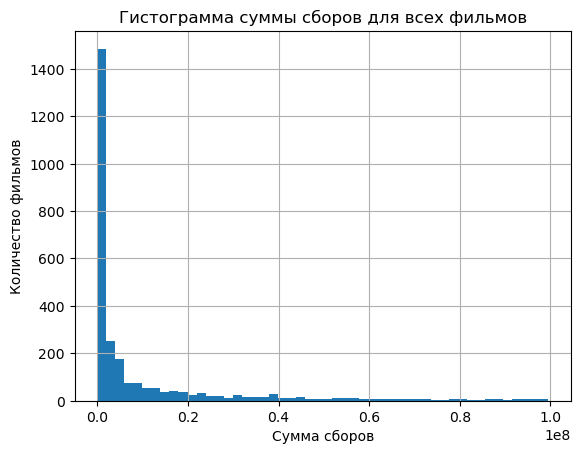

In [165]:
data.loc[data['box_office']<100000000, 'box_office'].hist(bins=50)
plt.title("Гистограмма суммы сборов для всех фильмов")
plt.xlabel("Сумма сборов")
plt.ylabel("Количество фильмов")
plt.show()

Фильмы с господдержкой в среденем имеют сумму сборов `13,848,461.92`. В то время как средняя сумма сборов всех фильмов `2,409,099.35`.

In [166]:
data_support['ratings'].describe()

count   314.00
mean      6.00
std       1.12
min       1.00
25%       5.30
50%       6.20
75%       6.70
max       8.50
Name: ratings, dtype: float64

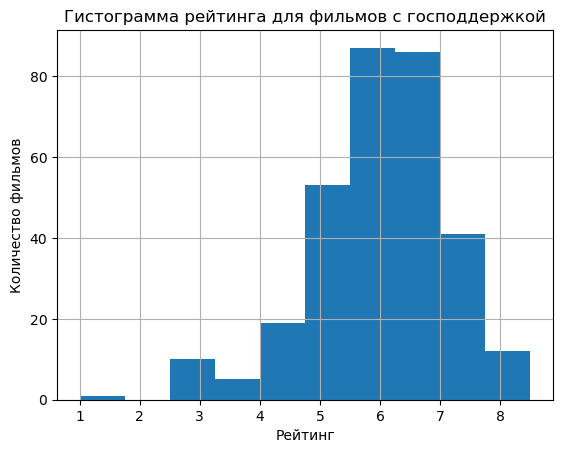

In [167]:
data_support['ratings'].hist()
plt.title("Гистограмма рейтинга для фильмов с господдержкой")
plt.xlabel("Рейтинг")
plt.ylabel("Количество фильмов")
plt.show()

In [168]:
data['ratings'].describe()

count   6,463.00
mean        6.48
std         1.10
min         1.00
25%         5.90
50%         6.60
75%         7.20
max         9.20
Name: ratings, dtype: float64

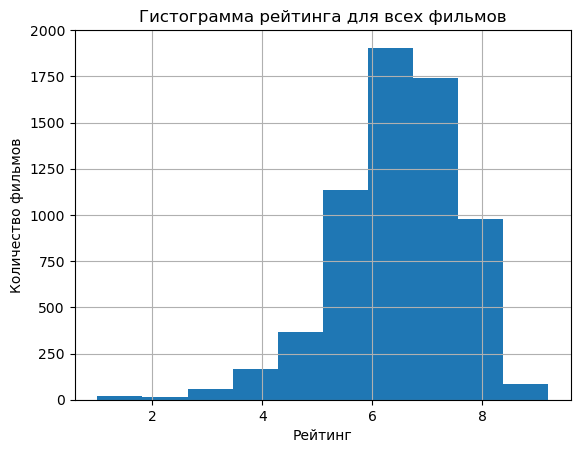

In [169]:
data['ratings'].hist()
plt.title("Гистограмма рейтинга для всех фильмов")
plt.xlabel("Рейтинг")
plt.ylabel("Количество фильмов")
plt.show()

Средний рейтинг фильмов с господдержкой `6.20`. Средний рейтинг всех фильмов `6.60`

После проведения анализа мы сделали вывод, что фильмы с господдержкой имеют большую сумму сборов, а рейтинг таких фильмов в среднем не отличается.

### 5. Общий вывод

Целью проекты было изучение рынка российского кинопроката и выявление текущих тренды, а также исследование фильмов, которые получили государственную поддержку. 

Для этого мы провели предобработку данных: исключили аномальные значения, обработали неявные дубликаты и присвоили корректный тип данных.

**Для удобства анализа добавили столбцы со следующими параметрами:**      
с информацией о годе проката (выделили год из даты премьеры фильма)  
с именем и фамилией главного режиссёра  
с основным жанром фильма  
с долей от общего бюджета фильма государственной поддержки
    

Посмотрели, сколько фильмов выходило в прокат каждый год. Проанализировали, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах в зависимости от года. И сделали вывод, что период с 2015 года полнее всего представленн в данных.

Изучили, как менялась динамика проката по годам (в 2014 году сумма сборов была минимальной, в 2017 году сумма сборов была максимальной).

Сделали вывод, что наибольшую сумму сборов имеют фильмы с возрастным ограничением «6+» и «12+». Драмы и комедии имеют большую поддержку.
